In [7]:
#iportar librerias
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
# Dar acceso al drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data: pd.DataFrame = pd.read_csv('/content/drive/MyDrive/argentina_cars.csv')

In [10]:
#mostrar tabla
data

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos
...,...,...,...,...,...,...,...,...,...,...,...,...
505,5250000,Chevrolet,Tracker,2018,Gris,Nafta,5.0,Automática,1.8,SUV,52000,pesos
506,46000,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,49000,dólares
507,3960000,Peugeot,2008,2017,Blanco,Nafta,5.0,Manual,1.6,SUV,75358,pesos
508,44900,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,57500,dólares


In [11]:
#mostrar columnas
data.columns

Index(['money', 'brand', 'model', 'year', 'color', 'fuel_type', 'door', 'gear',
       'motor', 'body_type', 'kilometres', 'currency'],
      dtype='object')

In [12]:
#Describe y da info acerca del dataset
data.describe()

,money,year,door,kilometres
count,5.100000e+02,510.000000,510.000000,510.000000
mean,3.970188e+06,2016.296078,4.474510,74436.370588
std,2.918454e+06,3.728058,0.761511,46771.799272
min,8.000000e+03,1995.000000,2.000000,500.000000
25%,2.312500e+06,2014.000000,4.000000,43000.000000
50%,3.489900e+06,2017.000000,5.000000,65750.000000
75%,5.237500e+06,2019.000000,5.000000,99100.000000
max,1.429900e+07,2022.000000,5.000000,335000.000000


In [13]:
#Te dice el tipo de dato
data.dtypes

money           int64
brand          object
model          object
year            int64
color          object
fuel_type      object
door          float64
gear           object
motor          object
body_type      object
kilometres      int64
currency       object
dtype: object

In [14]:
#Muestra la primera informacion de la tabla
data.head(0)
data.head(1)

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos


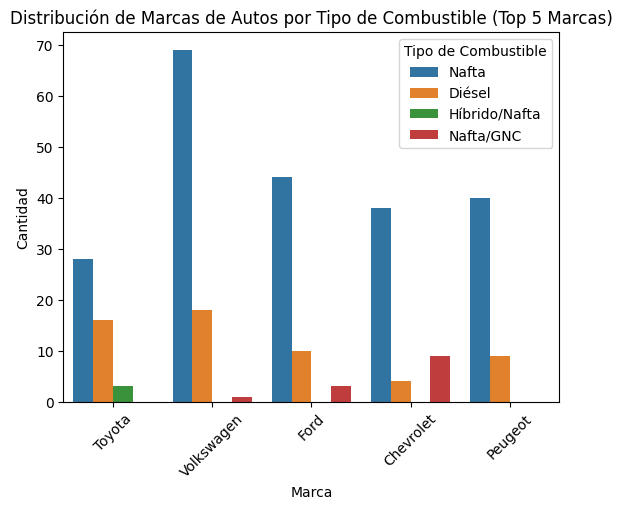

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las marcas más comunes (por ejemplo, las primeras 5 marcas)
top_brands = data['brand'].value_counts().head(5).index
filtered_data = data[data['brand'].isin(top_brands)]

sns.countplot(x='brand', hue='fuel_type', data=filtered_data)
plt.title('Distribución de Marcas de Autos por Tipo de Combustible (Top 5 Marcas)')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Combustible')
plt.show()


In [16]:
#Encodeamos los certificados para que cada cartificado tenga un número diferente usando LabelEncoder
le: LabelEncoder = LabelEncoder()
le.fit(data.color)
data.color = le.transform(data.color)

le.fit(data.body_type	)
data.body_type	 = le.transform(data.body_type)

le.fit(data.currency	)
data.currency	 = le.transform(data.currency)

le.fit(data.gear)
data.gear = le.transform(data.gear)

le.fit(data.model)
data.model = le.transform(data.model)


le.fit(data.motor)
data.motor = le.transform(data.motor)

le.fit(data.fuel_type	)
data.fuel_type	 = le.transform(data.fuel_type)


data.head(10)

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,47,2022,10,2,5.0,0,29,8,500,1
1,10850000,Jeep,43,2022,2,2,5.0,0,13,8,500,1
2,35500,Jeep,43,2022,6,2,5.0,0,13,8,500,0
3,19000,Citroën,28,2022,6,2,5.0,0,29,8,550,0
4,5800000,Toyota,46,2019,5,2,4.0,1,7,9,9000,1
5,34500,Jeep,43,2022,9,2,5.0,0,2,8,10500,0
6,25000,Kia,130,2014,9,0,5.0,0,11,8,156000,0
7,12300,Mercedes-Benz,38,2008,10,2,4.0,0,7,9,174000,0
8,35500,BMW,4,2016,2,2,2.0,0,28,0,66000,0
9,6800000,Volkswagen,137,2019,8,2,5.0,0,6,8,35000,1


In [17]:
# Elimina todas las filas con valores NaN en cualquier columna
data = data.dropna()

In [18]:
data_types = data.dtypes

# Imprime los tipos de datos de cada columna
print(data_types)

money           int64
brand          object
model           int64
year            int64
color           int64
fuel_type       int64
door          float64
gear            int64
motor           int64
body_type       int64
kilometres      int64
currency        int64
dtype: object


In [19]:
x:pd.DataFrame=data.drop(['money'],1)
X:pd.DataFrame=x.drop(['brand'], axis=1)
Y:pd.Series=data.money

<ipython-input-19-bdddfb344f2a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x:pd.DataFrame=data.drop(['money'],1)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
X_train

,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
86,70,2016,5,2,5.0,1,9,3,86000,1
273,70,2015,2,2,5.0,0,9,3,79000,1
337,104,2021,2,2,5.0,0,3,3,10900,0
222,137,2019,5,2,5.0,0,5,8,23000,1
253,61,2014,2,0,3.0,1,9,5,130000,1
...,...,...,...,...,...,...,...,...,...,...
257,150,2011,5,2,4.0,0,14,9,89000,1
362,67,2019,2,2,5.0,0,4,3,28000,1
2,43,2022,6,2,5.0,0,13,8,500,0
356,0,2022,2,2,4.0,0,25,6,4700,0


#5

In [21]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [22]:
Rl: LinearRegression = LinearRegression()
Rl.fit(X_train, Y_train)

LinearRegression()

In [23]:
valor: float= Rl.score(X_test, Y_test)
print("Score en la prueba" , valor)

Score en la prueba 0.6911675428753421


In [24]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
dtr: DecisionTreeRegressor = DecisionTreeRegressor()

In [25]:
parametros: dict[str, list[int]] = {
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_leaf': [3, 4, 5, 7, 10, 13],
    'min_samples_split': [4, 8, 16, 32, 64, 70],
    'max_features': [3, 4, 5, 6, 7, 8],
    'splitter': [ 'random', 'best']
}

In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid_search: GridSearchCV = GridSearchCV (dtr, parametros, error_score = 'raise', cv = 15)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=15, error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 7, 10, 13],
                         'min_samples_split': [4, 8, 16, 32, 64, 70],
                         'splitter': ['random', 'best']})

In [27]:
le.fit(data.brand	)
data.brand	 = le.transform(data.brand)

In [28]:
X: pd.DataFrame = data.drop('model', 1)
y: pd.Series = data['model']

<ipython-input-28-1099cf2791cf>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X: pd.DataFrame = data.drop('model', 1)


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [30]:
logr : LogisticRegression = LogisticRegression(random_state = 0)
logr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

y_predicciones =logr.predict(X_test)
print(y_predicciones)

accscore : float = accuracy_score(Y_test, y_predicciones)
print(accscore)

[ 17  17  17  17  17  17  46  17  17  17  17  17  17  17  24  17  37  17
  46  46  17  17  17  17  46  17  37  46  37  46  37  24  46  17  24  24
 139  17  17  17  17  17  17  17  17 139  17  37  17  17  17  17  17  24
  17  17  17  17  17  24  17  17  46  17  17 139  17  17  24  17  17  24
  24  17  17  17  24  17  17  17  24  37  17  37  17  46  17  17  17  17
  46  46  24  17  24  24  46  46  17  46  17  46]
0.049019607843137254


In [32]:
parametros: dict = {
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_leaf': [4, 8, 16, 32, 64, 70, 110],
    'min_samples_split': [4, 8, 16, 32, 64, 70, 110],
    'criterion' : ['entropy', 'gini']
}

DTC : DecisionTreeClassifier = DecisionTreeClassifier()

random_search : RandomizedSearchCV = RandomizedSearchCV(DTC, parametros, cv = 5, error_score='raise')
random_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_leaf': [4, 8, 16, 32, 64,
                                                             70, 110],
                                        'min_samples_split': [4, 8, 16, 32, 64,
                                                              70, 110]})

In [33]:
print(random_search.best_params_)
print(random_search.best_score_)

{'min_samples_split': 64, 'min_samples_leaf': 4, 'max_depth': 7, 'criterion': 'gini'}
0.169165913881361


In [34]:
DTC_tree : DecisionTreeClassifier = random_search.best_estimator_
print(DTC_tree)

y_pred = DTC_tree.predict(X_test)
print(y_pred)

accscore : float = accuracy_score(Y_test, y_pred)
print(accscore)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=64)
[113  17  24 117  70 113  24   3  70  46 117  96 113   3  46  46  73  73
  17 117 117  46 117  96  70  24  46  70 113  46  96 117  17   3  17  70
 113   3 113 117  77  24  73  17  24 113  96  96  73  46 117  73  77  73
  24 117  96   3  96  96  70  17  46  73   3  24   3  24 117   3  24  73
  96  17  17  46  96  96  96  24 117  96  70 113   3  24  24  73 113   3
  17 117   3  70  24  77  24  70  73  73  96  46]
0.17647058823529413


#7
La validación cruzada de k-folds y la validación cruzada aleatoria son dos maneras diferentes de probar si un modelo de aprendizaje automático funciona bien.
La validación cruzada de k-folds divide los datos en partes iguales, digamos 5 partes. Luego, en cada intento, entrena el modelo con 4 de esas partes y lo prueba con la última. Esto se hace 5 veces, una vez para cada parte, y se promedian los resultados. Es una forma ordenada y segura de probar.
La validación cruzada aleatoria no tiene un plan fijo. En cada intento, elige al azar qué datos usar para entrenar y cuáles para probar. Puede ser más rápido, pero menos predecible.
La elección entre estos dos métodos depende de qué tan preciso quieras ser y cuánto tiempo puedas dedicar. Si quieres ser muy preciso y tienes tiempo, usa la validación cruzada de k-folds. Si necesitas algo rápido y no te importa tanto la precisión, usa la validación cruzada aleatoria.

#8
Si bien el TP nos resultó muy interesante y entretenido, tuvimos muchas dificultades para llegar a completar el trabajo a tiempo. Hicimos lo posible y estamos satisfechos con los resultados conseguidos. Además, llegamos a la conclusión de que es muy importante que prestemos atención al dataset que elijamos a la hora de trabajar, ya que si este es incompleto o es difuso, esto puede llevar a tener que realizar muchas tareas extras y entorpecer el trabajo.